<a href="https://colab.research.google.com/github/Hrit-Saha/ML-Trained-Models/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Cost Prediction
---


## Context
We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

## Content
The dataset used for model building contained 1338 observations of 7 variables. The data contains the following information:

## Attribute Information:

- `age`:  age of primary beneficiary

- `sex`: insurance contractor gender, female, male

- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- `children`: Number of children covered by health insurance / Number of dependents

- `smoker`: Smoking or not.

- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- `charges`: Individual medical costs billed by health insurance



## Import visual libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Import the dataset

In [ ]:
data = pd.read_csv("/content/insurance.csv")

## Getting basic Information

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis(EDA)

The nature of the given data can be better understood when can visually analyse the distribution of features and corelations between the features.

## Visualization of the data

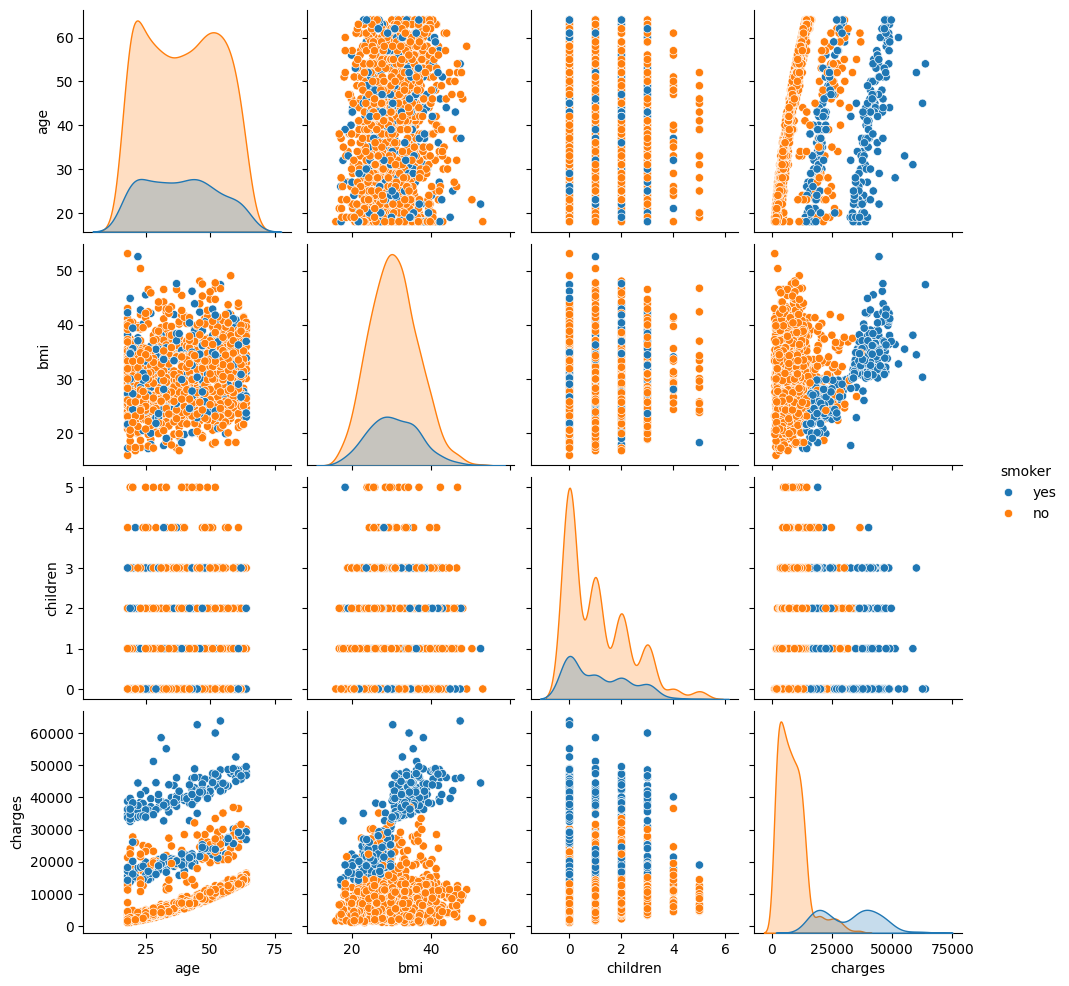

In [ ]:
sns.pairplot(data, hue='smoker')
plt.show()

* Higher BMI is associated with higher medical costs. Individuals with higher BMI are at greater risk for conditions such as diabetes, hypertension, and cardiovascular diseases, which increase medical expenses.

* Smokers tend to have significantly higher medical costs compared to non-smokers. Smoking is linked to a variety of health issues, including respiratory diseases, heart disease, and cancer.

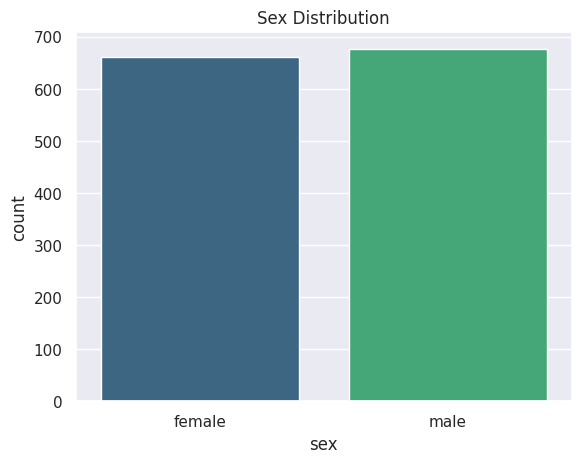

In [ ]:
sns.countplot(x='sex', hue='sex', data=data, palette='viridis')
plt.title('Sex Distribution')
plt.show()

* There can be differences in medical costs between males and females due to differences in healthcare needs. For example, women may incur higher medical costs during childbearing years.


<ipython-input-8-f012224a6e49>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


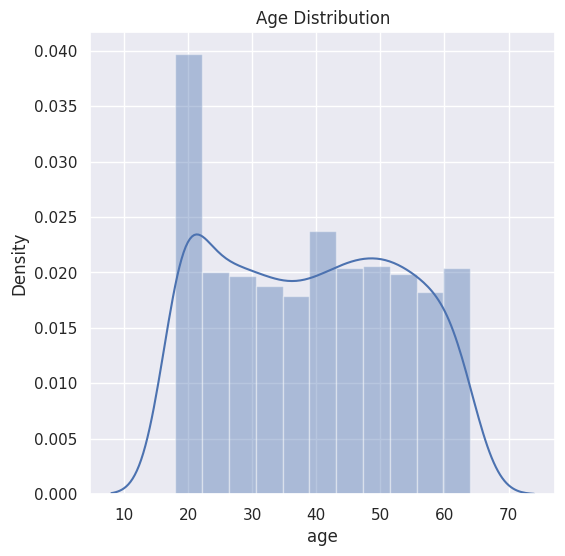

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

* Older individuals tend to have higher medical costs. As people age, they are more likely to develop chronic conditions or require more medical attention.

<ipython-input-29-c46103bc4e1e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

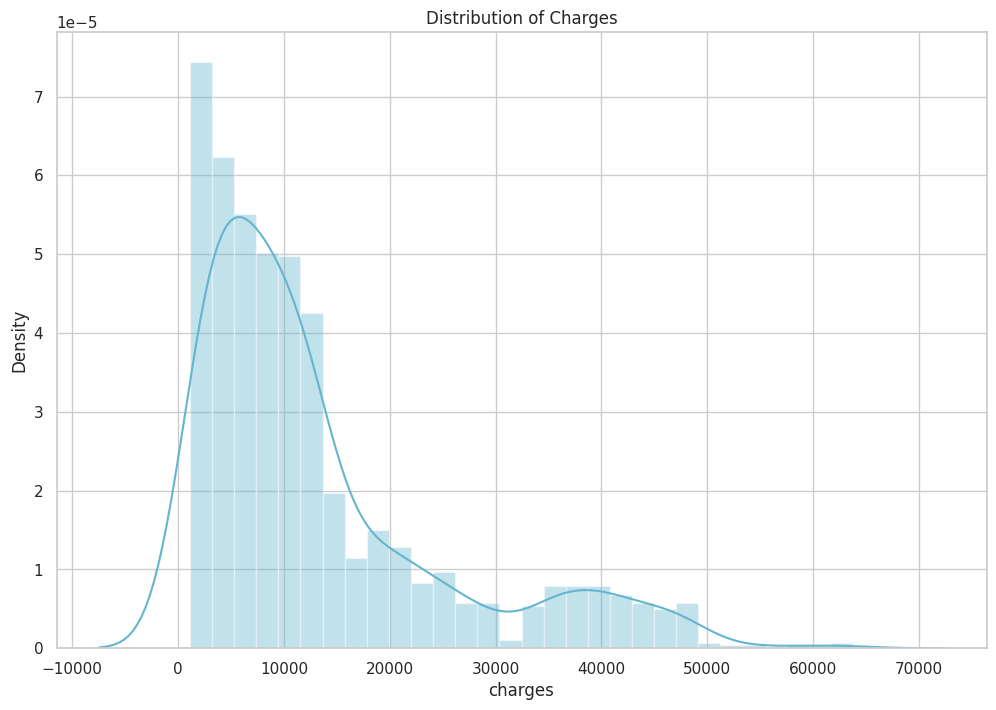

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

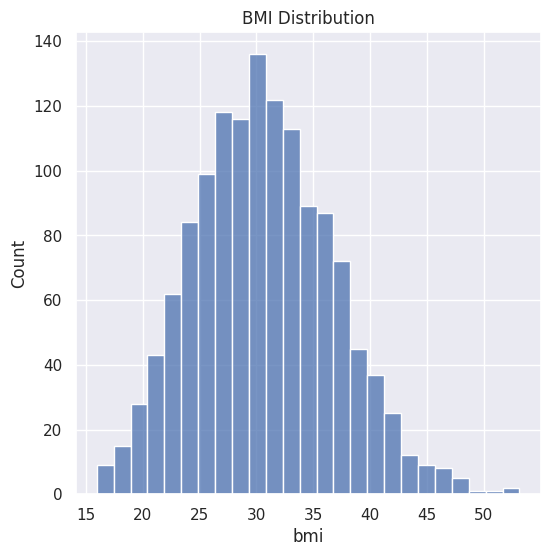

In [ ]:
sns.histplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

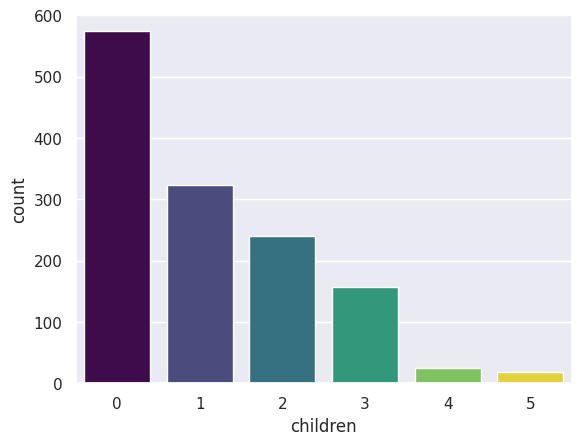

In [ ]:
sns.countplot(x='children', hue='children', data=data, palette='viridis' , legend= False)
plt.show()

* The number of children covered by the insurance policy can increase the total medical costs. More dependents mean more potential healthcare needs, such as pediatric care and vaccinations.

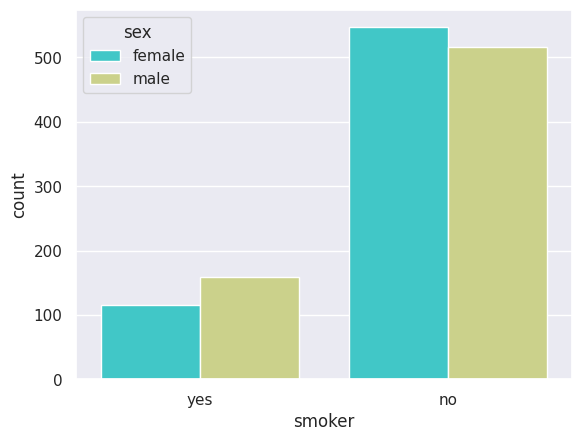

In [ ]:
sns.countplot(x='smoker', hue='sex', data=data, palette='rainbow')
plt.show()

<Axes: >

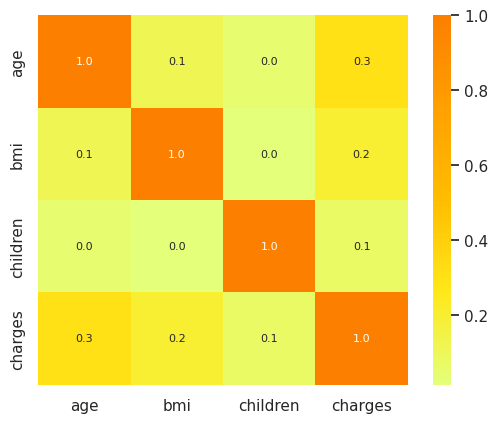

In [ ]:
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Wistia')

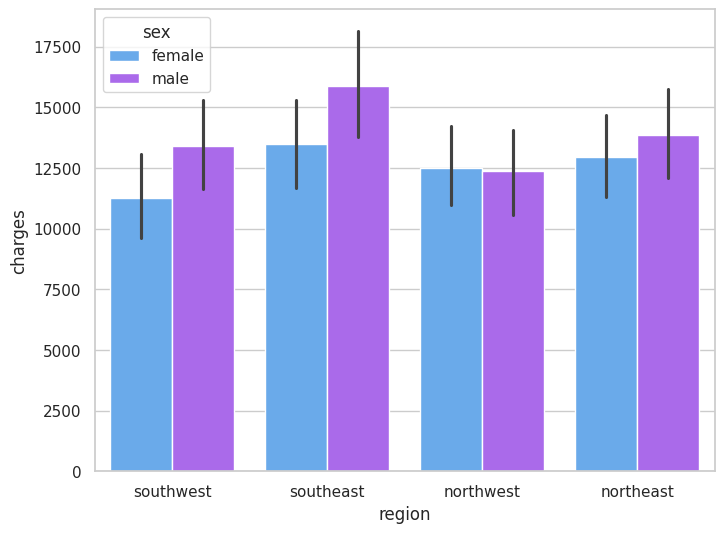

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')

* There can be regional variations in medical costs due to differences in healthcare access, cost of living, and prevalent health conditions. For example, the southeast region might show different cost patterns compared to the northwest.

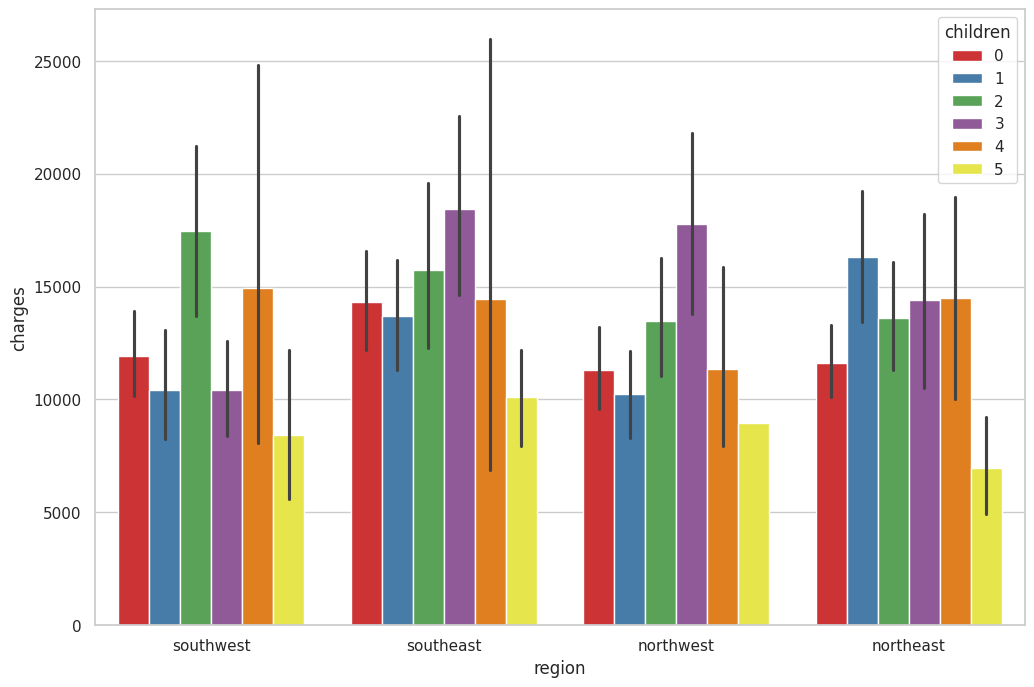

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

# ML Model Implementation

## Separate categorical and numerical columns

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

In [ ]:
data[categorical_columns].head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [ ]:
data[numerical_columns].head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


### Convert categorical columns to numerical

In [ ]:
data.replace({'sex':{'male':0,'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## ML Model fitting
By analysis the complexity of data based on various aspects like number of features, their varying scales, distribution of numerical features and the labels of categorical features, we can come to the conclusion that certain ML models may fit well to this dataset and predict target variable with high accuracy.
1. `Linear Reggresion`
2. `Random Forest Regression`


`charges` target feature and it is of numerical nature.

### Train-test split

In [ ]:
X = data.drop(columns='charges', axis=1)
y = data['charges']
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## Linear Regression

### Training the Linear Regression Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction and Evaluation of Linear Regression model

In [ ]:
prediction =regressor.predict(X_train)

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, prediction)
mse = metrics.mean_squared_error(y_train, prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_train, prediction))
r2_train = metrics.r2_score(y_train, prediction)
print('R squared vale : ', r2_train)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R squared vale :  0.751505643411174
MAE: 4150.500304883777
MSE: 36174978.427092075
RMSE: 6014.563860089282


In [ ]:
test_prediction =regressor.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, test_prediction)
test_mse = metrics.mean_squared_error(y_test, test_prediction)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_prediction))
r2_test = metrics.r2_score(y_test, test_prediction)
print('R squared vale : ', r2_test)
print('MAE:', test_mae)
print('MSE:', test_mse)
print('RMSE:', test_rmse)

R squared vale :  0.7447273869684076
MAE: 4267.213826730733
MSE: 38337035.48643885
RMSE: 6191.690842285236


## Random Forest Regression

### Training the Random Forest Regression Training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 100  , n_jobs = -1)
Rfr.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

### Prediction and Evaluation of Random Forest model

In [ ]:
prediction = Rfr.predict(X_train)

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, prediction)
mse = metrics.mean_squared_error(y_train, prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_train, prediction))
r2_train = metrics.r2_score(y_train, prediction)
print('R squared vale : ', r2_train)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R squared vale :  0.97752895087533
MAE: 996.2439638284394
MSE: 3271260.2751945863
RMSE: 1808.662565321289


In [ ]:
test_prediction = Rfr.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, test_prediction)
test_mse = metrics.mean_squared_error(y_test, test_prediction)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_prediction))
r2_test = metrics.r2_score(y_test, test_prediction)
print('R squared vale : ', r2_test)
print('MAE:', test_mae)
print('MSE:', test_mse)
print('RMSE:', test_rmse)

R squared vale :  0.8364290356763944
MAE: 2730.942045414739
MSE: 24565212.02706935
RMSE: 4956.330500185531
